In [1]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.insert(1,'/Users/jackh/Documents/FMBV_2023/gordon_original/src/') # FMBV src
# sys.path.insert(1,'/Users/jackh/Documents/FMBV_2023/gordon_original/experiments/StructuralFMBV/src/') # 

import qtree
import fmbv_refactor

from graph import Graph
import numpy as np
import scipy

import matplotlib.pyplot as plt

In [2]:
# Load 

base = 'wl1_5'

f = fmbv_refactor.FMBV(
    verbose=True,
    pd_low_threshold=2.0,
    max_pixel_value = 100.0,
    clip = True,
    mode = 0,
    mm = False,
    zoom = 1
    )

load_case = 6
if load_case == 1:
    pd_path = '/Users/jackh/Documents/FMBV_2023/gordon_original/test_batch/'+base+'_dp.nii.gz'
    seg_path = '/Users/jackh/Documents/FMBV_2023/gordon_original/test_batch/'+base+'_seg.nii.gz'
    kretz_path = '/Users/jackh/Documents/FMBV_2023/gordon_original/test_batch/'+base+'.vol'
elif load_case == 2:
    pd_path = '/Volumes/PIRG_Research/AnnArborPigStudy/Jack/Conversions/Pig_003/Image44_dp.nii.gz'
    seg_path = '/Volumes/PIRG_Research/AnnArborPigStudy/Pig_003_Mar10_2017/Logiq/Segmentation/Seg2/Seg2.nii.gz'
    kretz_path = '/Volumes/PIRG_Research/AnnArborPigStudy/Pig_003_Mar10_2017/Logiq/Voluson/Image44.vol'
elif load_case == 3:
    pd_path = '/Volumes/PIRG_Research/Wellcome Leap/Brain Kidney Liver Volumes/Brain/WL37_BRAIN_2_dp.nii.gz'
    seg_path = '/Volumes/PIRG_Research/Wellcome Leap/Brain Kidney Liver Volumes/Brain/WL37_BRAIN_2_seg.nii.gz'
    kretz_path = '/Volumes/PIRG_Research/Wellcome Leap/Brain Kidney Liver Volumes/Brain/WL37_BRAIN_2.vol'
elif load_case == 4:
    pd_path = '/Users/jackh/Documents/FMBV_2023/gordon_original/visualisation/artificial/'+base_art+'/'+base_art+'_dp.nii.gz'
    seg_path = '/Users/jackh/Documents/FMBV_2023/gordon_original/visualisation/artificial/'+base_art+'/'+base_art+'_seg.nii.gz'
    # f._set_default_segmentation()
    # f.load_seg('/Users/jackh/Documents/FMBV_2023/gordon_original/visualisation/artificial/artificial_artery_no_attenuation/artificial_artery_no_attenuation_seg1.nii.gz')
    kretz_path = '/Users/jackh/Documents/FMBV_2023/gordon_original/visualisation/artificial/'+base_art+'/'+base_art+'.vol'
elif load_case == 6:
    # p = 6
    kretz_path = '/Users/jackh/Documents/FMBV_2023/gordon_original/experiments/ParameterStudy/data_prelim_01/IMG_20240212_3_1.vol'
    pd_path = '/Users/jackh/Documents/FMBV_2023/gordon_original/experiments/ParameterStudy/data_prelim_01/IMG_20240212_3_1_dp.nii.gz'
    # seg_path = '/Volumes/PIRG_Research/AnnArborPigStudy/Pig_013_Sep22_2017/Logiq/Segmentations/Seg 1/Seg1.nii.gz'


f.load_pd(pd_path)

[verbose] Initialising FMBV object...
[verbose] Mode: 0
[verbose] Default memory handling.
[verbose] Loading Power Doppler...


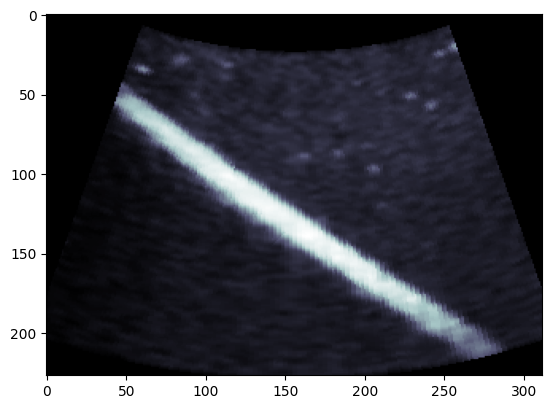

In [3]:
# --- pd example
pd_array = f.pd_array
img_array = pd_array[:,int(.5*pd_array.shape[1])-0,:]

plt.figure()
plt.imshow(img_array, cmap='bone')

In [4]:
q = qtree.QTree(img_array)
qimg = q.get_qimage()

0.02424319439737942


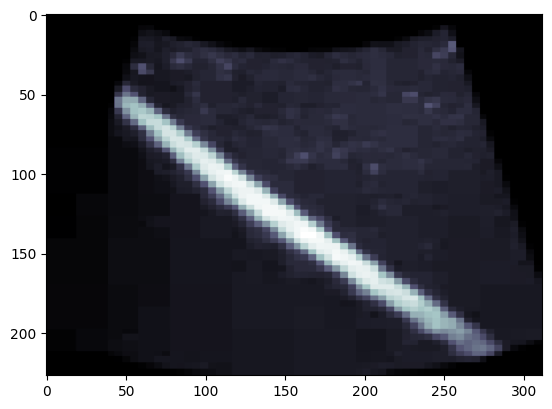

In [5]:
plt.figure()
plt.imshow(qimg, cmap='bone')

print(q.cr)

In [6]:
# graph testing ground...

g = Graph(verbose=True)
g.set(
    range(3),
    scipy.sparse.csr_matrix(np.array([[0,1,1], [1,0,1], [1,1,0]], dtype=bool))
)

ids = [(0,1)]
g.identify(ids)

# a = g.adj0[0,:]
# # a[0,1]

# rows,cols = a.nonzero()
# cols

Adjacency matrix: 
  (0, 1)	True
  (0, 2)	True
  (1, 0)	True
  (1, 2)	True
  (2, 0)	True
  (2, 1)	True
Eliminating... 
(0, 1)
[[ True False  True]]
